In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import re

import matplotlib.cm as cm
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cm.Dark2.colors)

In [65]:
def extract_substring(file_path):
    pattern = r'.*/(mbb_SM_\d+mm|Leptoquark_SM_\d+mm)_smear_reco_merged\.txt'
    match = re.search(pattern, file_path)
    if match:
        return match.group(1)
    pattern = r'.*/(mbb_SM|Leptoquark_SM)_nexus_reco_merged\.txt'
    match = re.search(pattern, file_path)
    if match:
        return match.group(1)
    return None


In [66]:
files = sorted(glob.glob("../files/reco/*"))

dfs = []
labels = []

for file_path in files:
    Model = extract_substring(file_path)
    print(Model, "loaded!")

    df = pd.read_csv(file_path, names=["event_id", "T1_gen", "costheta_gen", "T1_reco", "costheta_reco"])
    df["event_id"] =  df['event_id'].astype(int)
    df = df.sort_values(by='event_id')
    dfs.append(df)
    labels.append(Model)

display(dfs[0])


Leptoquark_SM_10mm loaded!
Leptoquark_SM_1mm loaded!
Leptoquark_SM_2mm loaded!
Leptoquark_SM_4mm loaded!
Leptoquark_SM loaded!
mbb_SM_10mm loaded!
mbb_SM_1mm loaded!
mbb_SM_2mm loaded!
mbb_SM_4mm loaded!
mbb_SM loaded!


,event_id,T1_gen,costheta_gen,T1_reco,costheta_reco
1109,25,1.471389,0.563857,1.460400,-0.024906
1110,26,1.728460,0.478581,1.444800,-0.505797
1111,27,2.237468,0.347120,2.370300,0.893211
1112,28,1.730651,-0.341447,1.714975,-0.427299
1113,29,2.291748,0.040423,2.389325,0.006394
...,...,...,...,...,...
164,10020,2.283077,-0.356060,2.336900,-0.216414
165,10021,2.198926,0.723527,2.212425,0.295481
166,10022,2.302391,0.899729,1.444300,0.067086
167,10023,2.282756,-0.084471,2.445250,-0.559718


Text(0, 0.5, 'Entries')

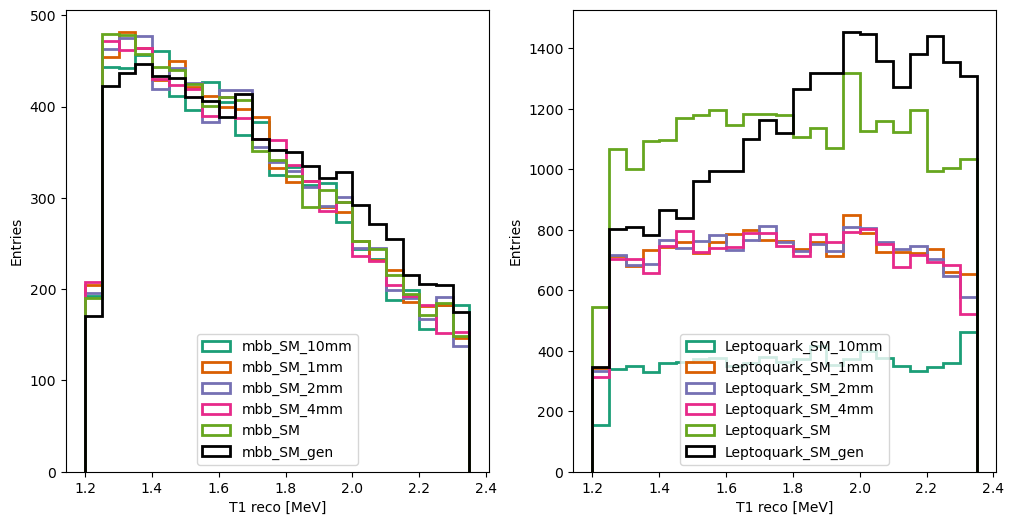

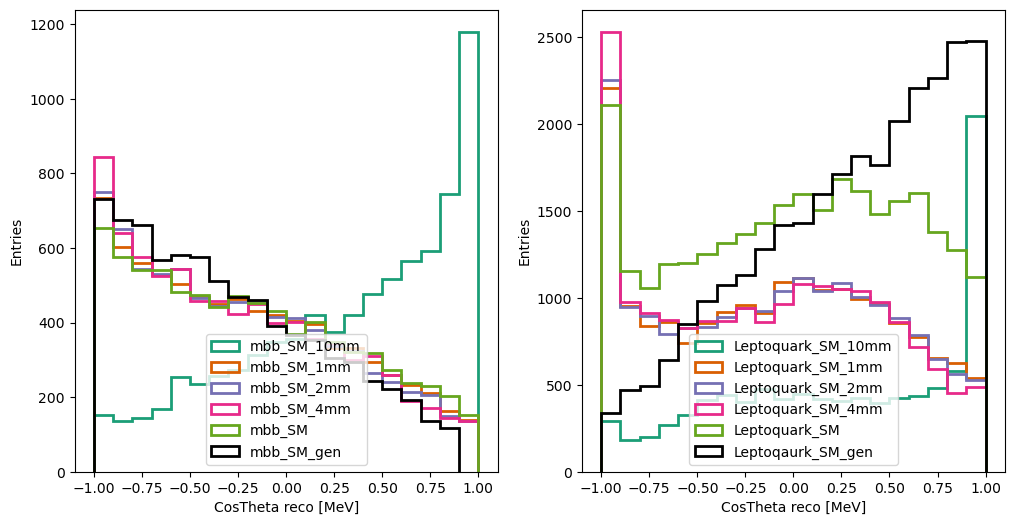

In [72]:
useLog=False
norm=False

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

gen=False

for index, df in enumerate(dfs):

    if (index == 4 or index == 9):
        gen=True
    else:
        gen=False
    
    if ("mbb" in labels[index]):
        ax1.hist(df.T1_reco, bins = np.arange(1.2,2.4,0.05), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);
        if(gen): ax1.hist(df.T1_gen, bins = np.arange(1.2,2.4,0.05), density=norm, log=useLog, histtype="step", label = "mbb_SM_gen", linewidth=2, color="k");

    elif ("Leptoquark" in labels[index]):
        ax2.hist(df.T1_reco, bins = np.arange(1.2,2.4,0.05), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);
        if(gen): ax2.hist(df.T1_gen, bins = np.arange(1.2,2.4,0.05), density=norm, log=useLog, histtype="step", label = "Leptoquark_SM_gen", linewidth=2, color="k");


ax1.set_xlabel("T1 reco [MeV]")
ax2.set_xlabel("T1 reco [MeV]")
ax1.set_ylabel("Entries")
ax2.set_ylabel("Entries")

ax1.legend(loc="lower center")
ax2.legend(loc="lower center")

gen=False

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
for index, df in enumerate(dfs):

    if (index == 4 or index == 9):
        gen=True
    else:
        gen=False

    if ("mbb" in labels[index]):
        ax1.hist(df.costheta_reco, bins = np.arange(-1,1.1,0.1), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);
        if (gen): ax1.hist(df.costheta_gen, bins = np.arange(-1,1,0.1), density=norm, log=useLog, histtype="step", label = "mbb_SM_gen", linewidth=2,color="k");

    elif ("Leptoquark" in labels[index]):
        ax2.hist(df.costheta_reco, bins = np.arange(-1,1.1,0.1), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);
        if (gen): ax2.hist(df.costheta_gen, bins = np.arange(-1,1.1,0.1), density=norm, log=useLog, histtype="step", label = "Leptoqaurk_SM_gen", linewidth=2,color="k")

ax1.legend(loc="lower center")
ax2.legend(loc="lower center")

ax1.set_xlabel("CosTheta reco [MeV]")
ax2.set_xlabel("CosTheta reco [MeV]")

ax1.set_ylabel("Entries")
ax2.set_ylabel("Entries")

Text(0, 0.5, 'Entries')

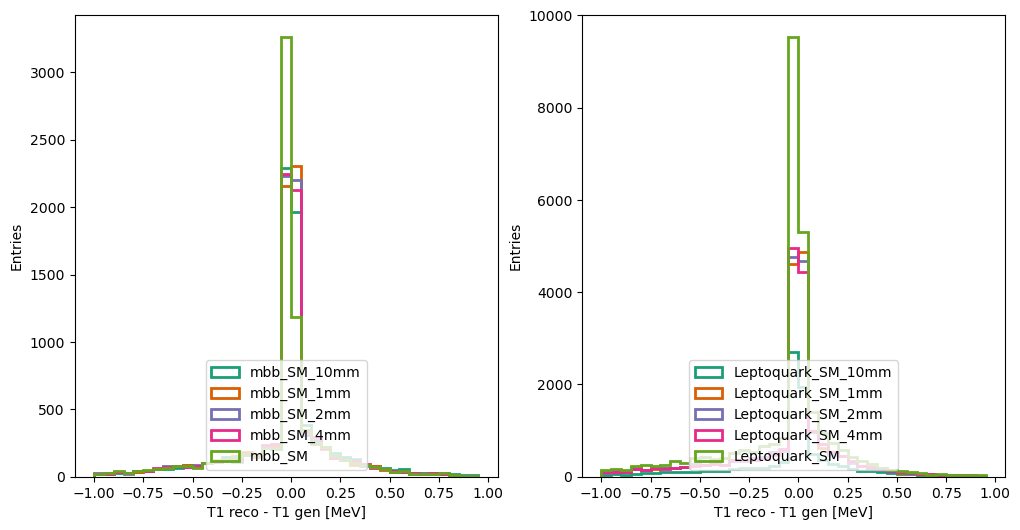

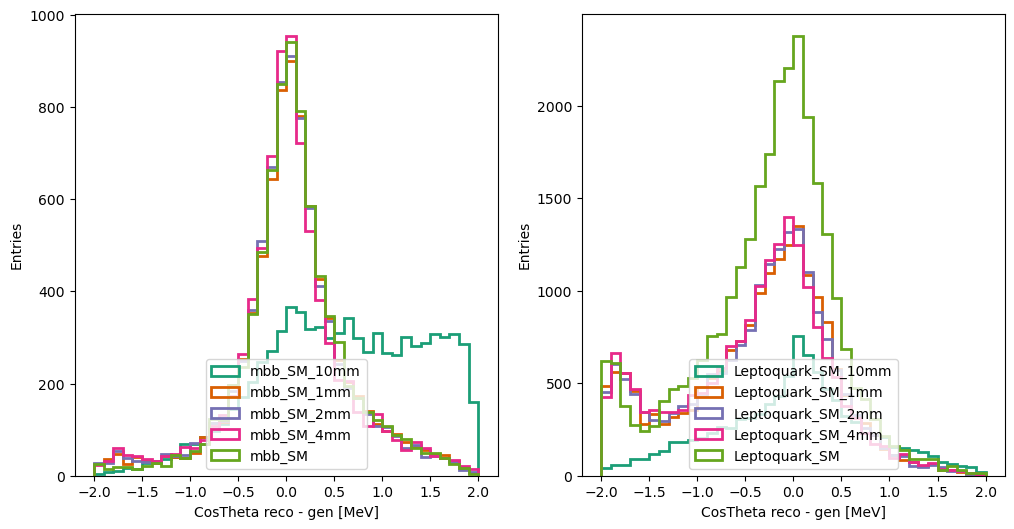

In [73]:
# Plot the reco-generator distributions

useLog=False

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

for index, df in enumerate(dfs):
    
    if ("mbb" in labels[index]):
        ax1.hist(df.T1_reco - df.T1_gen, bins = np.arange(-1,1,0.05), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);

    elif ("Leptoquark" in labels[index]):
        ax2.hist(df.T1_reco - df.T1_gen, bins = np.arange(-1,1,0.05), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);


ax1.set_xlabel("T1 reco - T1 gen [MeV]")
ax2.set_xlabel("T1 reco - T1 gen [MeV]")
ax1.set_ylabel("Entries")
ax2.set_ylabel("Entries")

ax1.legend(loc="lower center")
ax2.legend(loc="lower center")


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
for index, df in enumerate(dfs):

    if ("mbb" in labels[index]):
        ax1.hist(df.costheta_reco - df.costheta_gen, bins = np.arange(-2,2.1,0.1), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);

    elif ("Leptoquark" in labels[index]):
        ax2.hist(df.costheta_reco - df.costheta_gen, bins = np.arange(-2,2.1,0.1), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);

ax1.legend(loc="lower center")
ax2.legend(loc="lower center")

ax1.set_xlabel("CosTheta reco - gen [MeV]")
ax2.set_xlabel("CosTheta reco - gen [MeV]")

ax1.set_ylabel("Entries")
ax2.set_ylabel("Entries")